<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

#### IMPORTS

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

from tensorflow import keras
from tensorflow.keras.datasets import boston_housing

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Flatten
import numpy as np

from tensorflow.keras.datasets import mnist

#### LOAD DATA

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [3]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [4]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
pd.DataFrame(y_train).describe()

,0
count,404.000000
mean,22.395050
std,9.210442
min,5.000000
25%,16.675000
50%,20.750000
75%,24.800000
max,50.000000


#### SCALE INPUT DATA

In [6]:
# Scale the input data
scaler = StandardScaler()
X_train_scld = scaler.fit_transform(X_train)
X_test_scld  = scaler.fit_transform(X_test)

# print(f'X_train scaled:\n{pd.DataFrame(X_train_scld).describe()}')
# print(f'\nX_test scaled:\n{pd.DataFrame(X_test_scld).describe()}')

#### STAND UP A NEURAL NETWORK MODEL

In [7]:
# Create a model object (to be configured)
model = Sequential()

# Declare input and hidden layers
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dense(1, input_dim=13, activation='relu'))

# Configure the model for fitting/training
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


#### FIT/TRAIN THE MODEL

In [8]:
num_epochs = 100
model_history = model.fit(X_train_scld, y_train, epochs=num_epochs, verbose=0)

#### PLOT MODEL HISTORY

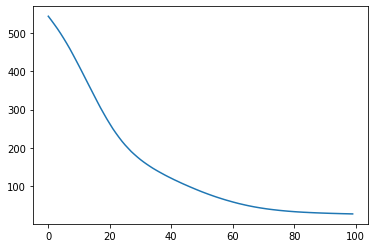

In [9]:
plt.figure()
plt.plot(range(num_epochs), model_history.history['loss'])

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

#### IMPORTS

#### LOAD DATA

In [10]:
(XM_train, ym_train), (XM_test, ym_test) = mnist.load_data()

print(f'X shape: {XM_train.shape}')
print(f'y shape: {ym_train.shape}')

X shape: (60000, 28, 28)
y shape: (60000,)


In [11]:
# Transform X values (0 => 255) to (0..1)
XM_train_scld = XM_train.astype('float32') / 255.0
XM_test_scld  = XM_test.astype('float32')  / 255.0

In [12]:
# Encode the output as categorical data
num_classes = 10 # number of classes we have is 10

ym_train_cat = keras.utils.to_categorical(ym_train, num_classes)
ym_test_cat  = keras.utils.to_categorical(ym_test, num_classes)
print(f'Output is one of 10 classes: {ym_train_cat[2]}')

Output is one of 10 classes: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
np.random.seed(42)

model_mnst = Sequential()
model_mnst.add(Flatten(input_shape=(28, 28)))   # flatten the input into a single array
model_mnst.add(Dense(10, activation="softmax")) # add a layer with 20 outputs using the softmax activation function

# Configure the model for training
model_mnst.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_mnst.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_mnst_num_epochs = 100

model_mnst_history = model_mnst.fit(XM_train_scld, ym_train_cat, epochs=model_mnst_num_epochs)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4695 - accuracy: 0.8770
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3036 - accuracy: 0.9150
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9209
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9233
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9254
Epoch 6/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2622 - accuracy: 0.9278
Epoch 7/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2583 - accuracy: 0.9284
Epoch 8/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2555 - accuracy: 0.9286
Epoch 9/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2532 - accuracy: 0.9306
Epoch 10/100
1875/1875 [==============================] - 3s 1ms/step - l

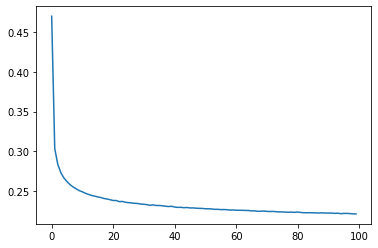

In [15]:
plt.figure()
plt.plot(range(model_mnst_num_epochs), model_mnst_history.history['loss'])

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.